In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

Saving data-from-180-samples.xlsx to data-from-180-samples.xlsx


In [ ]:
# Convert DNA sequence to numerical features
def sequence_to_features(seq):
  base_dict = {
      'A': 1, 'C': 2, 'G': 3, 'T': 4,
      'N': 0, '-': 0,
      'R': 5, 'Y': 6, 'M': 7, 'K': 8,
      'S': 9, 'W': 10, 'H': 11, 'B': 12,
      'V': 13, 'D': 14
  }
  return [base_dict.get(base, 0) for base in seq]

def plot_confusion_matrix(y_true, y_pred, title):
  plt.figure(figsize=(8, 6))
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(title)
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  return cm

In [ ]:
data = pd.read_excel('data-from-180-samples.xlsx')

# Create features and labels
X = np.array([sequence_to_features(seq) for seq in data['SEQ']])
y = data['Newcode'].str.contains('Case').astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
  'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
  'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
  'KNN': KNeighborsClassifier(n_neighbors=7),
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
  'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
  'FDA': LinearDiscriminantAnalysis(),
  'GBM': GradientBoostingClassifier(n_estimators=100, random_state=42),
  'Decision Tree': DecisionTreeClassifier(random_state=42),
  'Naive Bayes': GaussianNB()
}


Training SVM...

SVM Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        44
           1       1.00      0.10      0.18        10

    accuracy                           0.83        54
   macro avg       0.92      0.55      0.54        54
weighted avg       0.86      0.83      0.77        54



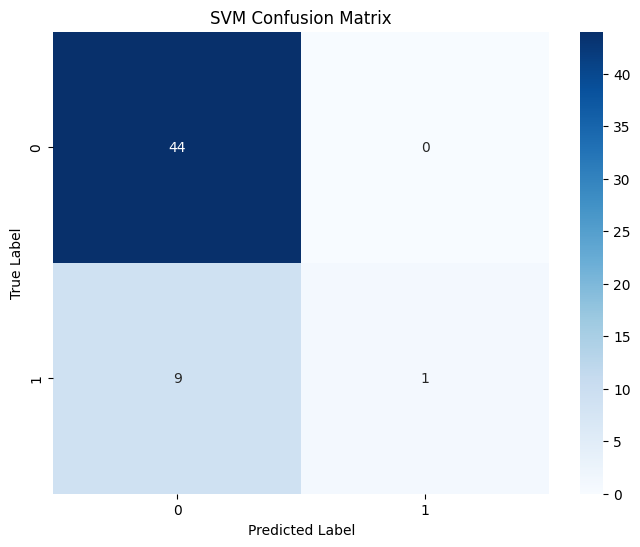


Training Neural Network...

Neural Network Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.12      0.10      0.11        10

    accuracy                           0.70        54
   macro avg       0.46      0.47      0.47        54
weighted avg       0.68      0.70      0.69        54



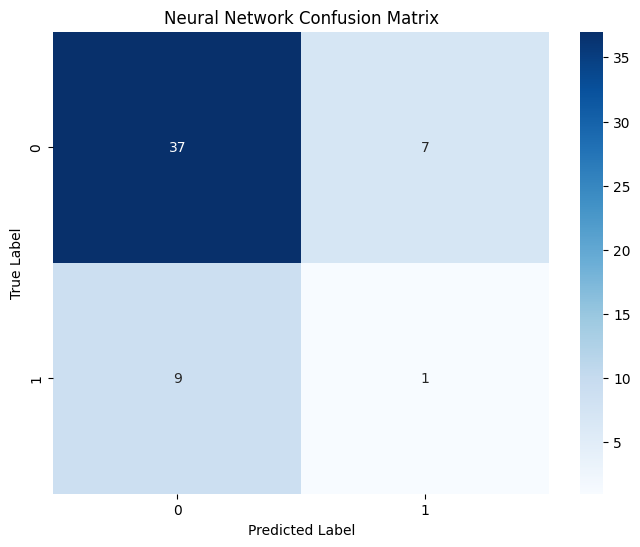


Training KNN...

KNN Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.60      0.30      0.40        10

    accuracy                           0.83        54
   macro avg       0.73      0.63      0.65        54
weighted avg       0.81      0.83      0.81        54



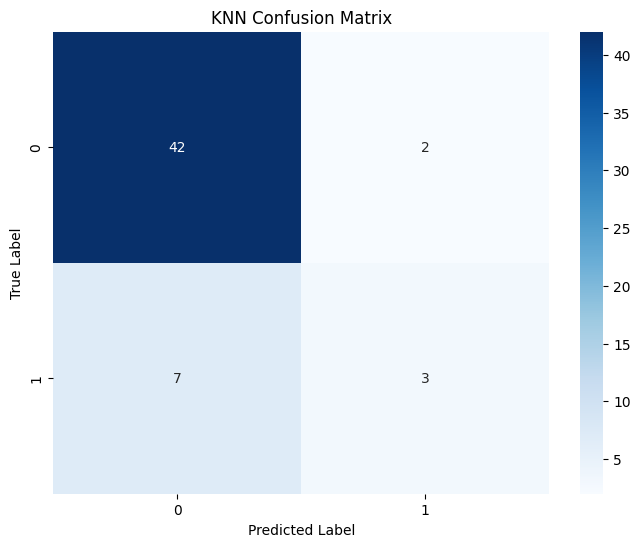


Training Logistic Regression...

Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        44
           1       0.14      0.10      0.12        10

    accuracy                           0.72        54
   macro avg       0.48      0.48      0.48        54
weighted avg       0.69      0.72      0.70        54



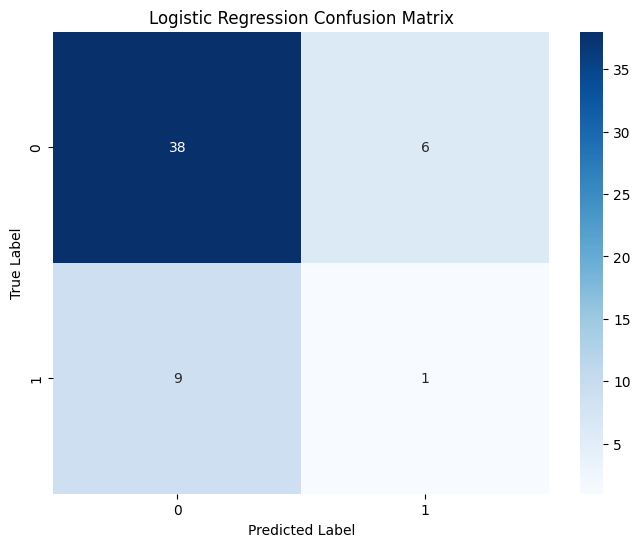


Training Random Forest...

Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.29      0.20      0.24        10

    accuracy                           0.76        54
   macro avg       0.56      0.54      0.55        54
weighted avg       0.73      0.76      0.74        54



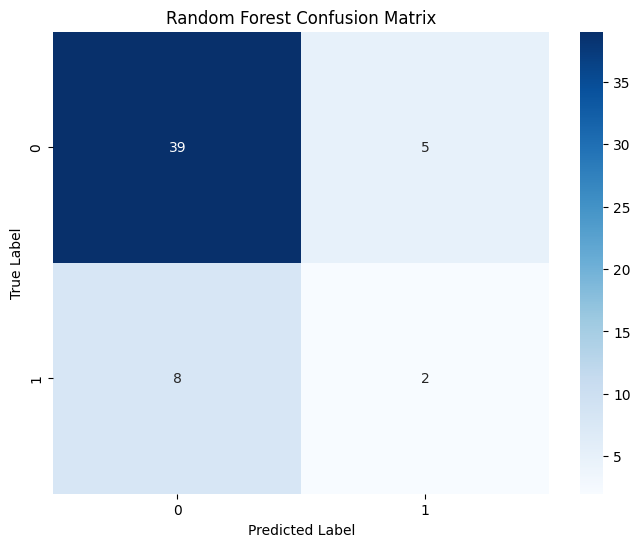


Training FDA...

FDA Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65        44
           1       0.17      0.40      0.24        10

    accuracy                           0.52        54
   macro avg       0.48      0.47      0.44        54
weighted avg       0.68      0.52      0.57        54



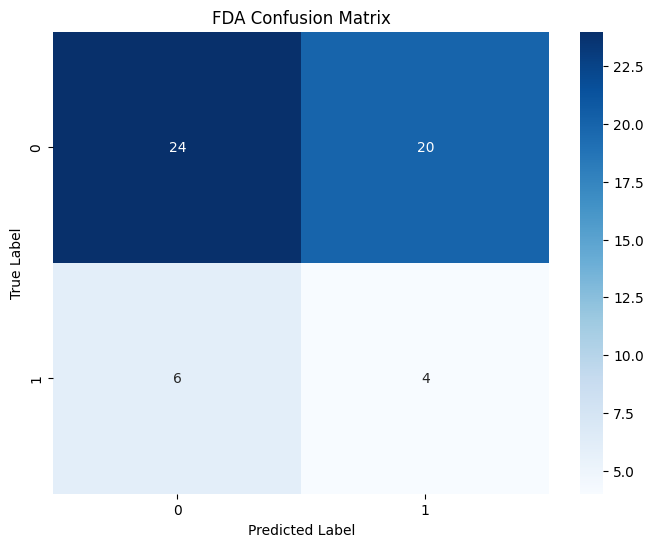


Training GBM...

GBM Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.40      0.40      0.40        10

    accuracy                           0.78        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.78      0.78      0.78        54



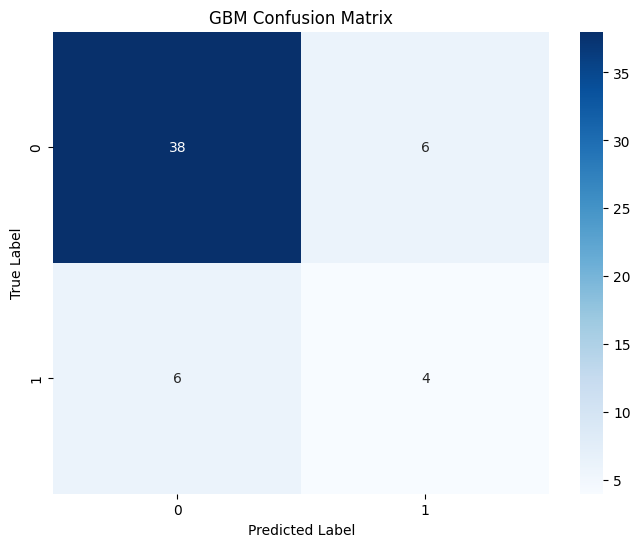


Training Decision Tree...

Decision Tree Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.40      0.40      0.40        10

    accuracy                           0.78        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.78      0.78      0.78        54



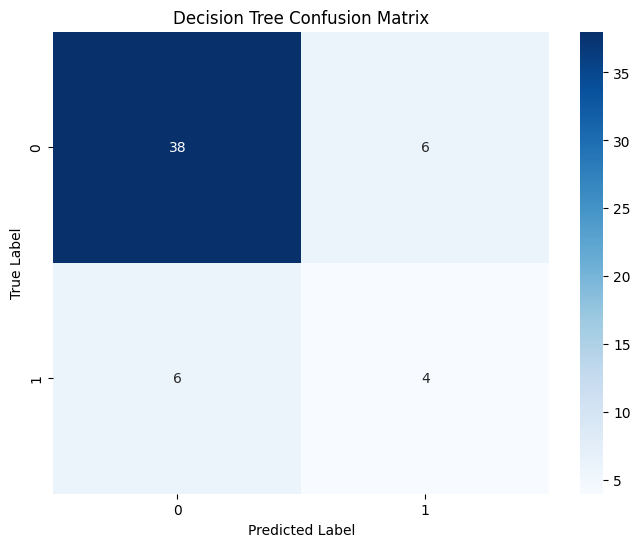


Training Naive Bayes...

Naive Bayes Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.67        44
           1       0.28      0.80      0.41        10

    accuracy                           0.57        54
   macro avg       0.60      0.66      0.54        54
weighted avg       0.80      0.57      0.62        54



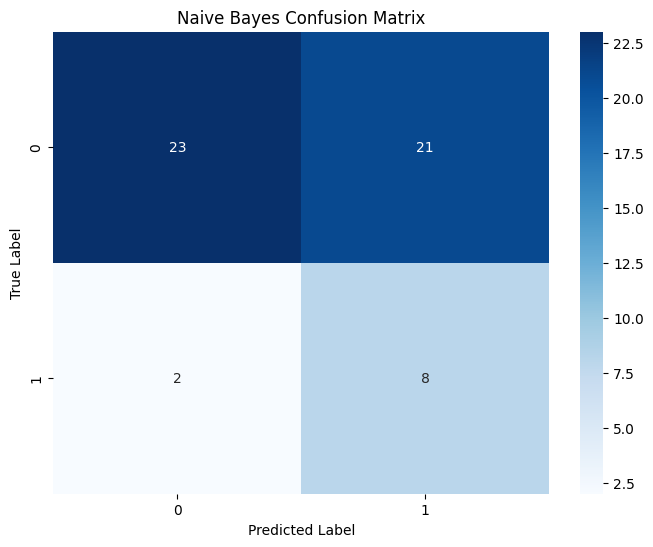

In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
  print(f"\nTraining {name}...")
  model.fit(X_train_scaled, y_train)

  # Make predictions
  y_pred = model.predict(X_test_scaled)

  results[name] = {
      'train_accuracy': model.score(X_train_scaled, y_train),
      'test_accuracy': model.score(X_test_scaled, y_test),
      'predictions': y_pred
  }

  print(f"\n{name} Results:")
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  plot_confusion_matrix(y_test, y_pred, f'{name} Confusion Matrix')

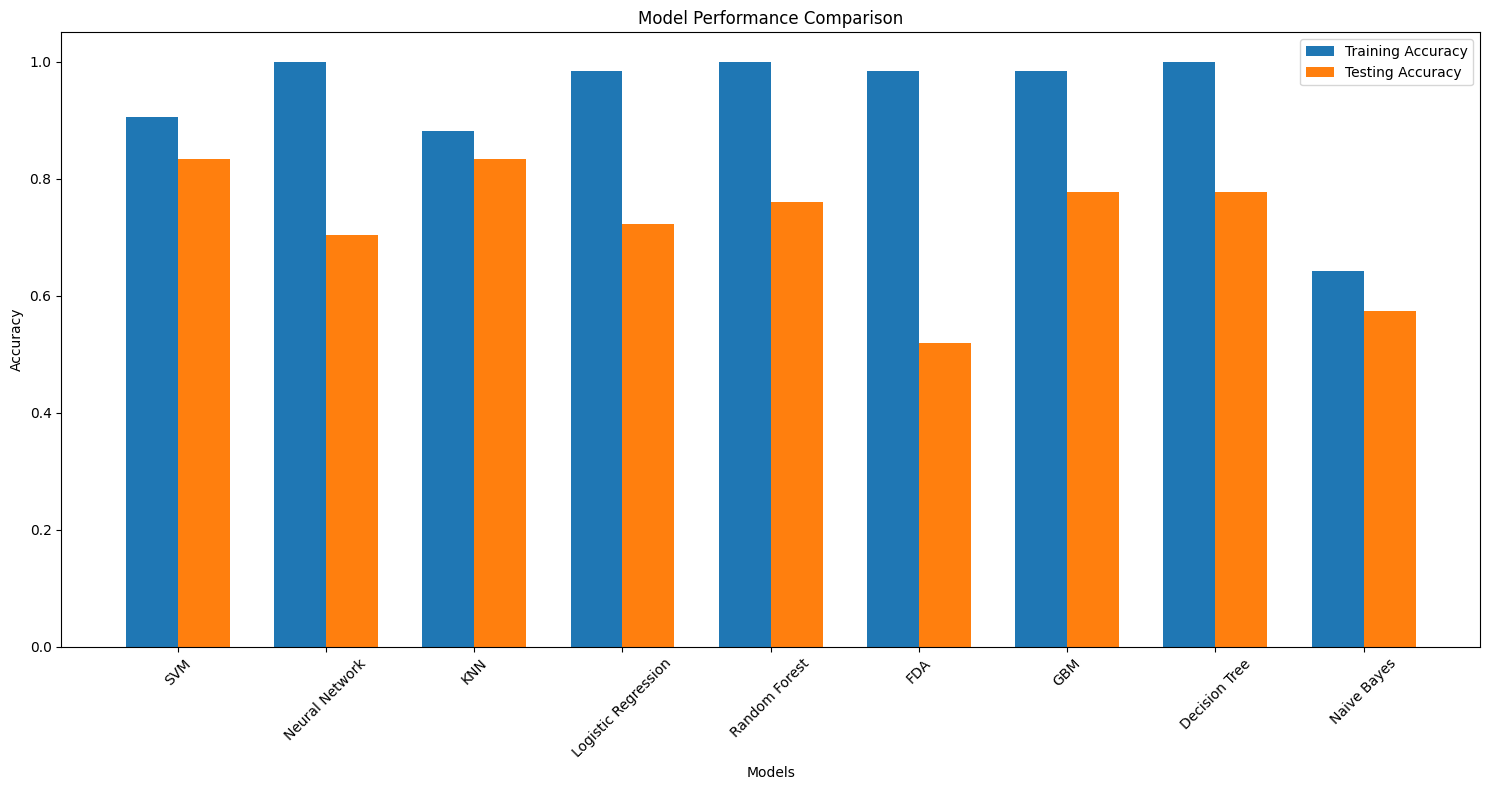

In [ ]:
# Compare model performances
plt.figure(figsize=(15, 8))
model_names = list(results.keys())
train_scores = [results[name]['train_accuracy'] for name in model_names]
test_scores = [results[name]['test_accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training Accuracy')
plt.bar(x + width/2, test_scores, width, label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Save models
import pickle
models_filename = 'hcv_classification_models.pkl'
with open(models_filename, 'wb') as f:
  pickle.dump({
      'models': models,
      'scaler': scaler
  }, f)

files.download(models_filename)

# Function for making predictions
def predict_new_sequence(sequence, models_dict, scaler):
  # Preprocess the sequence
  features = np.array([sequence_to_features(sequence)])
  features_scaled = scaler.transform(features)

  # Get predictions from all models
  predictions = {}
  for name, model in models_dict.items():
      pred = model.predict(features_scaled)[0]
      predictions[name] = 'Case' if pred == 1 else 'Control'

  return predictions

"""
# Example of how to use the prediction function
new_sequence = "AGCT..."  # Your sequence here
predictions = predict_new_sequence(new_sequence, models, scaler)
print("\nPredictions for new sequence:")
for model_name, prediction in predictions.items():
  print(f"{model_name}: {prediction}")
"""

# Created/Modified files during execution:
print("\nCreated/Modified files:")
print("hcv_classification_models.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'\n# Example of how to use the prediction function\nnew_sequence = "AGCT..."  # Your sequence here\npredictions = predict_new_sequence(new_sequence, models, scaler)\nprint("\nPredictions for new sequence:")\nfor model_name, prediction in predictions.items():\n  print(f"{model_name}: {prediction}")\n'